<a href="https://colab.research.google.com/github/mthonorio/IA/blob/main/projeto_final/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final de IA
## Disciplina: Inteligência Artificial 2021.2 ministrada por Thais Gaudêncio

## Equipe: 
* Matheus Batista Honório - 20190097098 
* Victória Monteiro Pontes - 20190031739

# Conjunto de dados de análise e previsão de ataque cardíaco


In [ ]:
#!pip3 install scipy==1.7.0
#!pip3 install auto-sklearn 

In [ ]:
#!pip3 install scipy==1.7.0

In [ ]:
# Importando modulos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_score, silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Importando o dataframe e printando os 5 primeiros valores
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Analisando as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Sobre esse dataset

**obs**: Angina é caracterizado como uma queimação ou pressão no peito


* Age - Idade do paciente 
* Sex  Sexo do paciente 
* exng  exercício induzindo angina (1 = sim; 0 = não) 
* ca - número de artérias (0-3) 
* cp - Tipo de angina 
  * típica angina
  * atípica angina 
  * dor não anginal 
  * assintomático
* trtbps - pressão sanguínea em repouso (em mm/Hg)
* chol - colesterol em mg/dl obtido via sensor IMC
* fbs - (taxa de glícose no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
* rest_ecg - resultado de eletrocardiogramas em repouso
 * normal
 * anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão de ST > 0,05 mV)
 * mostrando hipertrofia ventricular esquerda provável ou definitiva  pelos critérios de Estes
* thalach - frequência cardíaca máxima atingida
* target:
  * 0 = menos chances de ter um ataque cardíaco 
  * 1 = mais chances de ter um ataque cardíaco
* oldpeak - queda no segmento ST induzida por exercício em relação ao repouso
* caa - anomalia coronária arterial


In [ ]:
# Analisando a correlação entre todos os atributos
correlacao = df.corr()
correlacao.style.background_gradient(cmap = 'Blues')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# Removendo as colunas com o menor índice de correlação com o output do dataframe
df = df.drop(columns=['sex', 'caa', 'exng', 'oldpeak'])
df.head()

,age,cp,trtbps,chol,fbs,restecg,thalachh,slp,thall,output
0,63,3,145,233,1,0,150,0,1,1
1,37,2,130,250,0,1,187,0,2,1
2,41,1,130,204,0,0,172,2,2,1
3,56,1,120,236,0,1,178,2,2,1
4,57,0,120,354,0,1,163,2,2,1


In [ ]:
# Removendo dados duplicados
df = df.drop_duplicates()

# Removendo valores vazios
df = df.dropna(how = 'any')

In [ ]:
# Analisando a correlação entre todos os atributos
correlacao = df.corr()
correlacao.style.background_gradient(cmap = 'Blues')

,age,cp,trtbps,chol,fbs,restecg,thalachh,slp,thall,output
age,1.000000,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,-0.164124,0.065317,-0.221476
cp,-0.063107,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,0.116854,-0.160370,0.432080
trtbps,0.283121,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,-0.122873,0.062870,-0.146269
chol,0.207216,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.000417,0.096810,-0.081437
fbs,0.119492,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,-0.058654,-0.032752,-0.026826
restecg,-0.111590,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,0.090402,-0.010473,0.134874
thalachh,-0.395235,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,0.384754,-0.094910,0.419955
slp,-0.164124,0.116854,-0.122873,0.000417,-0.058654,0.090402,0.384754,1.000000,-0.103314,0.343940
thall,0.065317,-0.160370,0.062870,0.096810,-0.032752,-0.010473,-0.094910,-0.103314,1.000000,-0.343101
output,-0.221476,0.432080,-0.146269,-0.081437,-0.026826,0.134874,0.419955,0.343940,-0.343101,1.000000


Text(0, 0.5, 'Values')

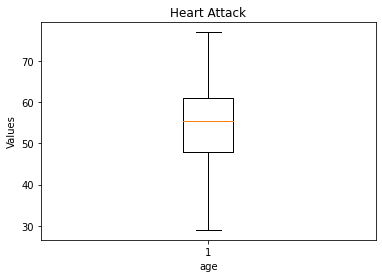

In [ ]:
# Análise exploratória dos dados de saída utilizando boxplot
plt.boxplot(df['age'])

plt.title('Heart Attack')
plt.xlabel('age')
plt.ylabel('Values')

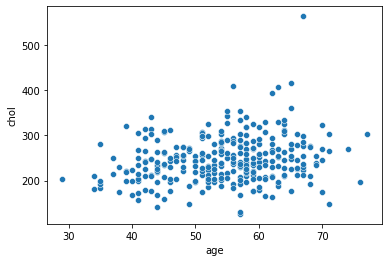

In [ ]:
sns.scatterplot(x='age',y='chol',data=df)

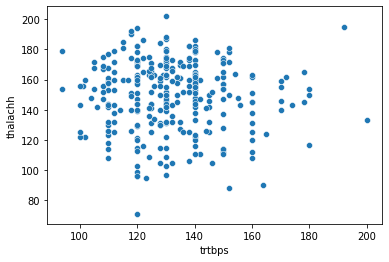

In [ ]:
sns.scatterplot(x='trtbps',y='thalachh',data=df)

In [ ]:
# Analisando o balanceamento entre pessoas com e sem ataque cardíaco
df['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [ ]:
# Dividindo o dataframe em uma proporção 7 por 3
X = df.drop('output', axis = 1)
y = df['output']

Features = ['age',	'cp',	'trtbps',	'chol',	'fbs',	'restecg',	'thalachh',	'slp',	'thall']
Outcome = ['output']

# Normalizando os dados pegando a média e dividindo pelo desvio padrão retirando discrepâncias e outlayers
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
pip install auto-sklearn 

In [ ]:
#pip install scipy -U

Utilizando o AutoML para descobrir o melhor algoritmo para ser utilizado no treinamento e sua acurácia.

In [ ]:
from autosklearn.classification import AutoSklearnClassifier #Lib para utilizar o AutoML

In [ ]:
# O algoritmo irá executar por 4 minutos, com um tempo máximo de 30 segundos para cada uma das instância, usando todos os processadores disponíveis
# (O algoritmo será executado 8x durante este tempo).
model_holdout = AutoSklearnClassifier(time_left_for_this_task=7*60, per_run_time_limit=30, n_jobs=-1)

# Inicializa a busca do algoritmo
model_holdout.fit(X_train, y_train)

# Plotando as estatísticas do processo
print(model_holdout.sprint_statistics())

# Testando o modelo
y_h = model_holdout.predict(X_test)
acc = accuracy_score(y_test, y_h)
print("Acuracia: %.3f" % acc)

auto-sklearn results:
  Dataset name: 2537cb80-f272-11ec-82ca-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.842857
  Number of target algorithm runs: 81
  Number of successful target algorithm runs: 81
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

Acuracia: 0.758


In [ ]:
# Escolhendo o modelo de Cross Validation Iterative Fit
model_cv_iterative_fit = AutoSklearnClassifier(time_left_for_this_task=7*60, per_run_time_limit=30, n_jobs=-1, resampling_strategy = 'cv-iterative-fit', resampling_strategy_arguments={'folds': 10})

# Inicializa a busca
model_cv_iterative_fit.fit(X_train, y_train)

# Mostrando as estatísticas do processo
print(model_cv_iterative_fit.sprint_statistics())

# Testando o melhor modelo
y_cv_if = model_cv_iterative_fit.predict(X_test)
acc = accuracy_score(y_test, y_cv_if)
print("Acuracia: %.3f" % acc)

auto-sklearn results:
  Dataset name: 22bbdab6-f273-11ec-82ca-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.810427
  Number of target algorithm runs: 29
  Number of successful target algorithm runs: 28
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

Acuracia: 0.747


In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, model_holdout.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, model_holdout.predict(X_test))))

Ein: 0.1564
Eout: 0.2418


In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, model_cv_iterative_fit.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, model_cv_iterative_fit.predict(X_test))))

Ein: 0.1469
Eout: 0.2527


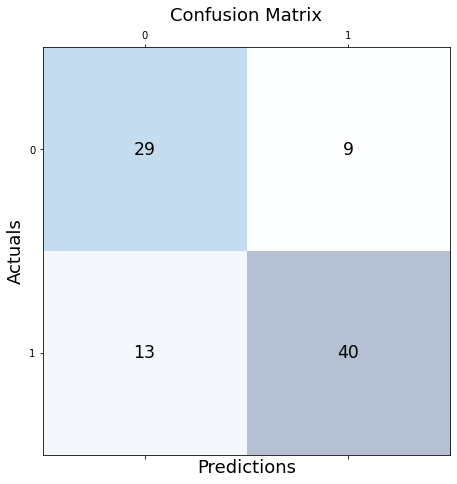

In [ ]:
# Matrix de confusão
conf_matrix = confusion_matrix(y_test, y_h)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Foram encontrados resultados bastante satisfatórios com uma taxa de acurácia de 75,8% e com a Matriz de confusão obtivemos uma bela taxa de acertos com os verdadeiros positivos e verdadeiros negativos comparados aos falsos positivos e negativos.

## Criando uma Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

age:0.11237204013126814
cp:0.7560114155770924
trtbps:0.0
chol:0.0
fbs:0.0
restecg:0.0
thalachh:0.1316165442916394
slp:0.0
thall:0.0


<BarContainer object of 9 artists>

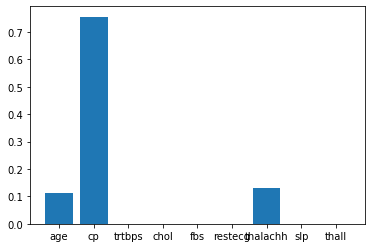

In [ ]:
for feature, importance in zip(Features, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(Features, clf.feature_importances_)

Analisando o gráfico acima percebe-se que nossa coluna de CP que representa os tipos de angina é a nossa coluna mais importante para os resultados obtidos

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.1943
Eout: 0.2857
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        38
           1       0.76      0.74      0.75        53

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.72        91



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(9)))
model.add(tf.keras.layers.Dense(5, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinando o modelo com 70 testes por época (500x épocas)
history = model.fit(X_train, y_train, epochs=500, batch_size=70, validation_data=(X_test, y_test))

Epoch 1/500
4/4 [==============================] - 1s 75ms/step - loss: 0.2569 - accuracy: 0.5261 - val_loss: 0.2377 - val_accuracy: 0.5824
Epoch 2/500
4/4 [==============================] - 0s 19ms/step - loss: 0.2567 - accuracy: 0.5261 - val_loss: 0.2376 - val_accuracy: 0.5824
Epoch 3/500
4/4 [==============================] - 0s 14ms/step - loss: 0.2566 - accuracy: 0.5261 - val_loss: 0.2375 - val_accuracy: 0.5824
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 0.2566 - accuracy: 0.5261 - val_loss: 0.2370 - val_accuracy: 0.5824
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2556 - accuracy: 0.5213 - val_loss: 0.2365 - val_accuracy: 0.5824
Epoch 6/500
4/4 [==============================] - 0s 19ms/step - loss: 0.2547 - accuracy: 0.5261 - val_loss: 0.2360 - val_accuracy: 0.5824
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 0.2538 - accuracy: 0.5355 - val_loss: 0.2359 - val_accuracy: 0.5824
Epoch 8/500
4/4 [===

Após analise da aprendizagem, foi constatado uma acurácia de 74,88% a 76%% dependendo da execução.

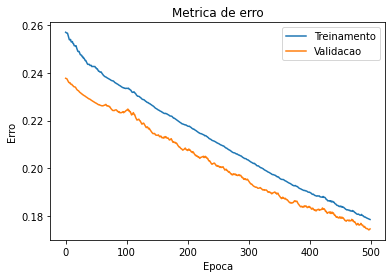

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

In [ ]:
pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

In [ ]:
y_pred = np.round(model.predict(X_test))

In [ ]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.79      0.83      0.81        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



array([[26, 12],
       [ 9, 44]])

In [141]:
X_test[67].shape

(9,)

In [142]:
X_train[67]

array([0.39583333, 0.        , 0.3255814 , 0.31818182, 0.        ,
       0.        , 0.8778626 , 1.        , 0.66666667])

In [ ]:
y_test[67]

1

In [ ]:
np.round(model.predict(X_test[67].reshape(1,-1)))

array([[1.]], dtype=float32)

Abaixo testamos a acurácia utilizando o método KNN com o número de vizinhos default, ou seja, 5 vizinhos próximos obtemos o melhor resultado do KNN 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
KNN.score(X_test,y_test)

0.7362637362637363

In [ ]:
# Aplicando os valores de teste
y_pred = KNN.predict(X_test) 

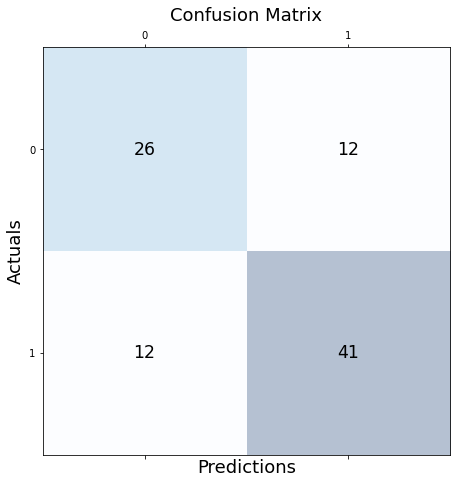

In [ ]:
# Matrix de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

Acurácia do modelo:  0.7362637362637363


### Conclusão:

Com a experiência do projeto, pudemos implementar uma IA de predição com resultados satisfatórios que possuem aplicação no mundo real. 

Identificando pacientes que têm probabilidade de ter ou não um ataque cardíaco passando seus dados médicos como parâmetro. Obtivemos o melhor resultado treinando nossa IA com o modelo holdout e uma árvore de decisão com uma predição satisfatória utilizando 70 testes por época.

A implementação do projeto somente foi possível com o conhecimento passado durante a disciplina que serviu como aprendizagem prática.